# PCA

$\large \mathbf{X} = {\begin{pmatrix} x_{1,1}&\cdots&x_{1,p} \\ \vdots & \ddots &\vdots \\ x_{n,1}&\cdots&x_{n,p} \end{pmatrix} }_{n\times p} = {\begin{pmatrix} X_1 & \cdots&X_p \end{pmatrix} }_{n\times p}$ where $n$ is the number of samples and $p$ is the number of features.
<br/><br/>
$\large \mathrm{Cov}(X) = {\begin{pmatrix} \mathrm{cov}[X_1, X_1] & \cdots & \mathrm{cov}[X_1, X_p] \\ \vdots & \ddots &\vdots \\ \mathrm{cov}[X_p, X_1] & \cdots & \mathrm{cov}[X_p, X_p]\end{pmatrix}}_{p\times p} = {\begin{pmatrix} \mathrm{var}[X_1] & \cdots & \mathrm{cov}[X_1, X_p] \\ \vdots & \ddots &\vdots \\ \mathrm{cov}[X_p, X_1] & \cdots & \mathrm{var}[X_p]\end{pmatrix}}_{p\times p}$

[Relationship between PCA and SVD](https://stats.stackexchange.com/a/134283)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Codes

In [84]:
data = make_classification(#n_features=4, 
                           n_samples=10**3, weights=[0.9], random_state= 42, )
#data = make_classification(n_features=2, n_informative=2,n_redundant=0,n_samples=1000, n_clusters_per_class=2, weights=[0.9], random_state= 42, )

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = .2, random_state=42,)

In [103]:
pca = PCA(n_components=2, random_state=42, svd_solver='auto')

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
xpca = pca.fit_transform(X_train_sc)

In [109]:
u.dot(np.diag(s))

(800, 20)

In [104]:
xpca

array([[ 1.77774354, -0.58563607],
       [ 0.2612659 ,  0.59186165],
       [-0.23103433,  2.09704588],
       ...,
       [ 1.16470754,  2.06088412],
       [ 0.70823629,  0.47223255],
       [ 0.96628558, -1.09295898]])

In [101]:
(X_train_sc - X_train_sc.mean(axis=0)).dot(pca.components_.T)

array([[ 1.78141977, -0.94647922],
       [ 0.26013539,  0.96186926],
       [-0.23277473,  2.45263287],
       ...,
       [ 1.16443405,  2.18687769],
       [ 0.70875081,  0.2505776 ],
       [ 0.96521724, -0.84796578]])

In [79]:
np.allclose(xpca, X_train_sc.dot(pca.components_.T))

False

In [75]:
X_train_sc.var()

0.9999999999999993

In [71]:
pca.explained_variance_

array([3.0668676 , 0.93813866])

In [74]:
(X_train_sc - X_train_sc.mean(axis=0)).dot(pca.components_.T).var(axis=0, ddof=1)

array([3.0668676 , 0.93813866])

$$
\large X = U S V^*
$$

In [102]:
u, s, v = np.linalg.svd(X_train_sc, full_matrices=False, )

In [18]:
cov= np.cov(X_train_sc - X_train_sc.mean(axis=0), rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [19]:
np.allclose(v[0], eigenvectors.T[0])

False

In [20]:
eigenvectors[0,1]

-0.5057229118627715

In [21]:
np.isclose(abs(v), abs(eigenvectors.T))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [20]:
np.allclose(v.T.dot(v), np.eye(v.shape[0]))

True

In [22]:
np.isclose(eigenvectors.T.dot(eigenvectors), np.eye(eigenvectors.shape[0]))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True, False],
       [ True,  True, False,  True]])

In [26]:
X_train_sc.shape

(800, 4)

In [69]:
comp_idx = 0
cosine_similarity(v[comp_idx:comp_idx+1,:], eigenvectors[:,comp_idx].reshape(1,-1))

array([[-1.]])

In [85]:
((u.T).dot(u) - np.eye(800)).min()

-1.7763568394002505e-15

In [27]:
np.allclose((u.T).dot(u) , np.eye(u.shape[0]))

True

In [28]:
np.allclose((v.T).dot(v) , np.eye(v.shape[0]))

True

In [82]:
np.round((u.T).dot(u) - np.eye(800), 2)

array([[ 0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -0.,  0.],
       [ 0.,  0.,  0., ..., -0.,  0., -0.],
       [ 0.,  0.,  0., ...,  0., -0., -0.]])

In [77]:
np.round((v.T).dot(v), 2)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [75]:
eigenvectors.dot( np.matrix(eigenvectors).H)

matrix([[ 1.01230942,  0.06288618, -0.03379583, -0.08403019],
        [ 0.06288618,  1.14011871,  0.01014754, -0.09029393],
        [-0.03379583,  0.01014754,  0.90831919, -0.11137876],
        [-0.08403019, -0.09029393, -0.11137876,  0.93925268]])

In [78]:
np.round((eigenvectors.T).dot(eigenvectors),2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.  , -0.  ],
       [ 0.  , -0.  ,  1.  ,  0.22],
       [ 0.  , -0.  ,  0.22,  1.  ]])

In [36]:
np.square(s)/(X_train_sc.shape[0]-1)

array([3.06686760e+00, 9.38138656e-01, 1.54891299e-31, 4.74019816e-32])

In [34]:
np.square(s)/(X_train_sc.shape[0]-1)

array([3.06686760e+00, 9.38138656e-01, 1.54891299e-31, 4.74019816e-32])

In [7]:
cov= np.cov(X_train_sc - X_train_sc.mean(axis=0), rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [9]:
eigenvalues

array([3.06686760e+00, 9.38138656e-01, 9.63907292e-17, 2.74949812e-16])

In [65]:
pca.explained_variance_

array([3.0668676 , 0.93813866])

In [68]:
pca.explained_variance_ratio_

array([0.7657585, 0.2342415])

In [11]:
pca.components_

array([[ 0.37537327, -0.56343987,  0.47853489, -0.55913753],
       [-0.77887225,  0.17161566,  0.5645045 , -0.21269872]])

In [12]:
-(eigenvectors[:, :2].T)

array([[ 0.37537327, -0.56343987,  0.47853489, -0.55913753],
       [-0.77887225,  0.17161566,  0.5645045 , -0.21269872]])

In [13]:
xpca

array([[ 0.23675929,  0.79205581],
       [ 0.96430644, -1.33873515],
       [-2.64001914,  0.06398657],
       ...,
       [ 1.64837173, -0.88211564],
       [-2.08038828,  0.35941666],
       [ 0.01904595, -0.24080798]])

In [14]:
(X_train_sc - X_train_sc.mean(axis=0)).dot(pca.components_.T)

array([[ 0.23675929,  0.79205581],
       [ 0.96430644, -1.33873515],
       [-2.64001914,  0.06398657],
       ...,
       [ 1.64837173, -0.88211564],
       [-2.08038828,  0.35941666],
       [ 0.01904595, -0.24080798]])

1st and 2nd component vectors are orthonormal

In [15]:
np.round((eigenvectors[:, :2].T).dot(eigenvectors[:, :2]), 2)

array([[1., 0.],
       [0., 1.]])

# Visualization

In [11]:
X_syn, y_syn = sm.get_symthetic()

In [12]:
X_df = pd.DataFrame(np.vstack((X_train, X_syn)), columns = ['col_{}'.format(str(i).zfill(2)) for i in range(data[0].shape[1])])
X_df['class'] = ['train: {}'.format(i) for i in y_train.tolist()] + ['train: 1(SMOTE)']*len(y_syn)

In [13]:
pca = PCA(n_components=2, random_state=42)

scaler = StandardScaler()
xpca = pca.fit_transform(scaler.fit_transform(X_df.values[:, :-1]))

In [14]:
xpca

array([[-5.64145582e-01,  3.64190600e-01],
       [ 6.79575012e-02, -1.61110949e+00],
       [-2.99131204e+00,  1.41352506e-03],
       ...,
       [-2.51963575e-01,  1.76225050e+00],
       [-6.46719600e-01,  2.52867286e+00],
       [-1.37055965e-01,  2.71672359e+00]])

In [ ]:
X_train_cov = 

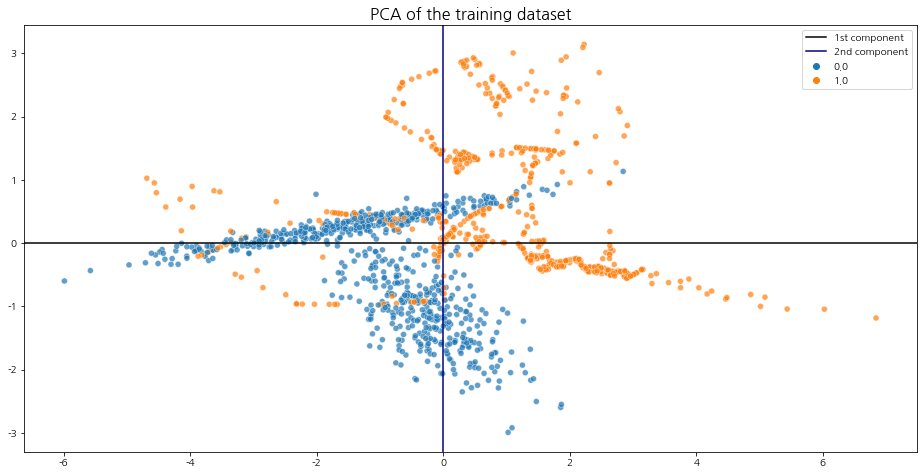

In [149]:
fig, ax = plt.subplots(1,1, figsize = (16,12))
ax.set_aspect(1)
ax.axline((.0, .0), (pca.transform(pca.components_)[0,0], pca.transform(pca.components_)[0,1]), c='k', label='1st component')
ax.axline((.0, .0), (pca.transform(pca.components_)[1,0], pca.transform(pca.components_)[1,1]), c='navy', label='2nd component')
sns.scatterplot(x = xpca[:,0], y=xpca[:,1], hue=y_samp,  alpha=.7 )
plt.title('PCA of the training dataset', fontsize = 16)
plt.show()

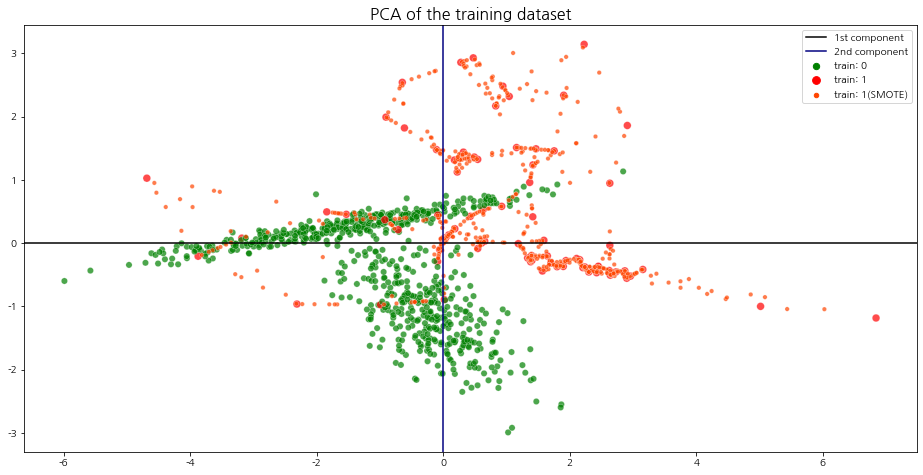

In [159]:
fig, ax = plt.subplots(1,1, figsize = (16,12))
ax.set_aspect(1)
ax.axline((.0, .0), (pca.transform(pca.components_)[0,0], pca.transform(pca.components_)[0,1]), c='k', label='1st component')
ax.axline((.0, .0), (pca.transform(pca.components_)[1,0], pca.transform(pca.components_)[1,1]), c='navy', label='2nd component')
sns.scatterplot(x = xpca[:,0], y=xpca[:,1], hue=X_df.values[:, -1], palette={'train: 0':'green', 'train: 1':'red', 'train: 1(SMOTE)':'orangered'}, size=X_df.values[:, -1], 
                sizes={'train: 0':40, 'train: 1':60, 'train: 1(SMOTE)':20}, alpha=.7 )
plt.title('PCA of the training dataset', fontsize = 16)
plt.show()

In [160]:
num_linspace = .02
ll = [np.arange(xpca.min(axis=0)[col] -.2 , xpca.max(axis=0)[col] +.2 ,num_linspace) for col in range(xpca.shape[1]) ]

In [161]:
xx, yy, = np.meshgrid(*ll)

In [162]:
if X_df.shape[1]<=3:
    Z = model_rf.predict_proba(np.c_[xx.ravel(), yy.ravel(),])[:, 1 ]
else:
    Z = model_rf.predict_proba(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel(),]))[:, 1 ]

In [163]:
cm = plt.cm.RdBu_r

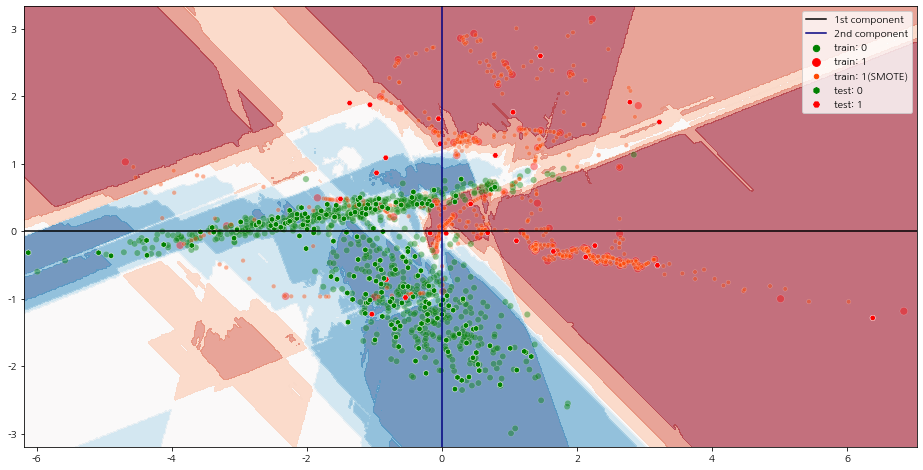

In [168]:
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1,1, figsize = (16,12))
ax.set_aspect(1)

ax.axline((.0, .0), (pca.transform(pca.components_)[0,0], pca.transform(pca.components_)[0,1]), c='k', label='1st component')
ax.axline((.0, .0), (pca.transform(pca.components_)[1,0], pca.transform(pca.components_)[1,1]), c='navy', label='2nd component')

# Plot filled contours
plt.contourf(xx, yy, Z, cmap=cm, alpha=.6)

# Plot the training points
sns.scatterplot(x = xpca[:,0], y=xpca[:,1], hue=X_df.values[:, -1], palette={'train: 0':'green', 'train: 1':'red', 'train: 1(SMOTE)':'orangered'}, size=X_df.values[:, -1],
                hue_order = ['train: 0', 'train: 1', 'train: 1(SMOTE)'], sizes = {'train: 0':40, 'train: 1':60, 'train: 1(SMOTE)':20}, alpha = .4 )

# Plot the testing points
if data[0].shape[1]<=2:
    sns.scatterplot(x = (X_test)[:, 0], y = (X_test)[:, 1], hue = y_test, palette={0:'green', 1:'red'}, style=y_test, markers={0:'*', 1:'v'}, )
else:
    y_test_str = np.vectorize(lambda x: 'test: 1' if x==1 else 'test: 0')(y_test)
    sns.scatterplot(x = pca.transform(scaler.transform(X_test))[:, 0], y = pca.transform(scaler.transform(X_test))[:, 1], hue = y_test_str, hue_order = ['test: 0', 'test: 1'],
                     palette={'test: 0':'green', 'test: 1':'red'}, style = y_test_str, markers={'test: 0':'h', 'test: 1':'H'},  alpha=1.  )
plt.legend()
plt.show()